In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

data = pd.read_excel('data/data.xlsx', sheet_name = '1st Trial', names = ['time (min)', 'm_xylene', 'NO', 'NO2', 'NOx', 'NOx/m_xy', 'beta', 'NO,NO2 crossing time (min)', 'Wall loss factor', 'Peak O3 Concentration', '50% of Final M0 Time', 'PeakDp', 'deltaHC', 'm_xy consume ratio', 'deltaHC / beta', 'deltaHC * beta', 'M0', 'yield'])

In [2]:
X = data['deltaHC']
y = data['M0']

In [3]:
X_reg = (X).to_numpy().reshape(-1, 1)
y_reg = y.to_numpy().reshape(-1, 1)
corr = np.round(X.corr(y), 3)
model = LinearRegression()
reg = model.fit(X_reg, y_reg)
coef = reg.coef_
intercept = reg.intercept_

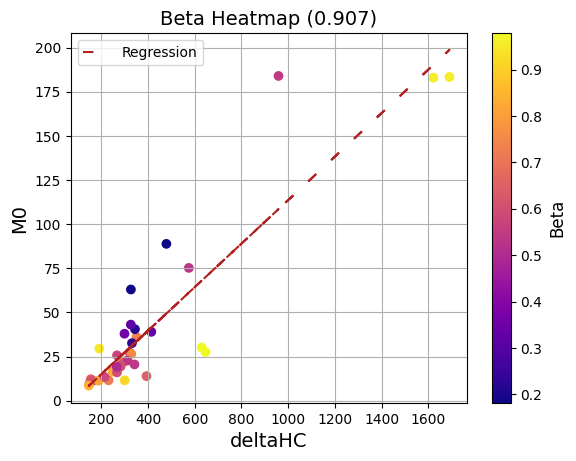

In [4]:
plt.scatter(X, y, c = data['beta'], cmap = 'plasma')
plt.plot(X_reg, X_reg @ coef + intercept, label = 'Regression', color = 'firebrick', linestyle = (0, (5, 10)))
plt.xlabel('deltaHC', fontsize = 14)
plt.ylabel('M0', fontsize = 14)
plt.title(f'Beta Heatmap ({corr})', fontsize = 14)
plt.grid()

cbar = plt.colorbar()
cbar.set_label('Beta', fontsize = 12)

plt.legend()
plt.show()

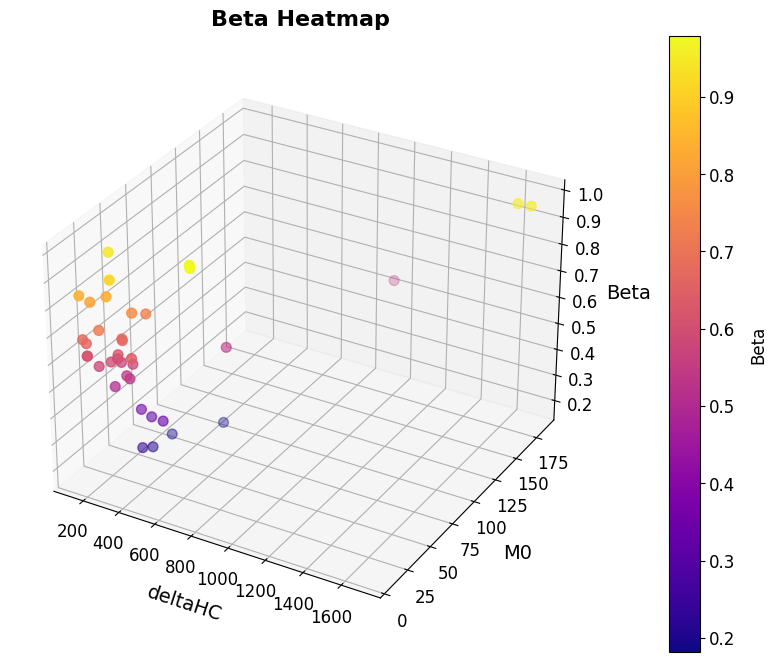

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X, y, data['beta'], c = data['beta'], cmap='plasma', s=50)

ax.set_title("Beta Heatmap", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("deltaHC", fontsize=14, labelpad=10)
ax.set_ylabel("M0", fontsize=14, labelpad=10)
ax.set_zlabel("Beta", fontsize=14, labelpad=10)
ax.tick_params(axis='both', labelsize=12)

cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Beta", fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)

plt.show()

In [6]:
logX = np.log(X)
logY = np.log(y)

In [7]:
logdata = pd.DataFrame({'logX': logX, 'logY': logY})
logdata.corr()

,logX,logY
logX,1.000000,0.863542
logY,0.863542,1.000000


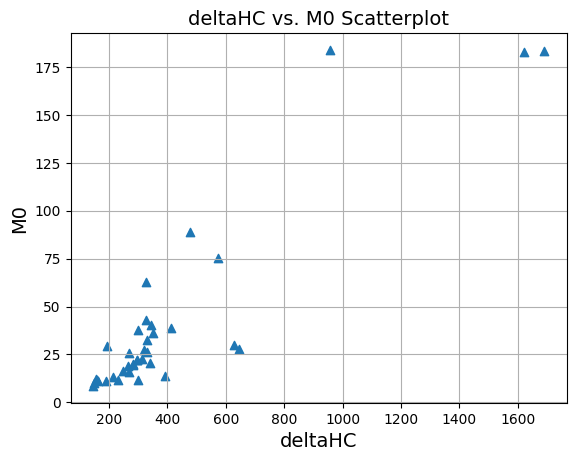

In [8]:
plt.scatter(X, y, marker = '^')
plt.xlabel('deltaHC', fontsize = 14)
plt.ylabel('M0', fontsize = 14)
plt.title(f'deltaHC vs. M0 Scatterplot', fontsize = 14)
plt.grid()
plt.show()

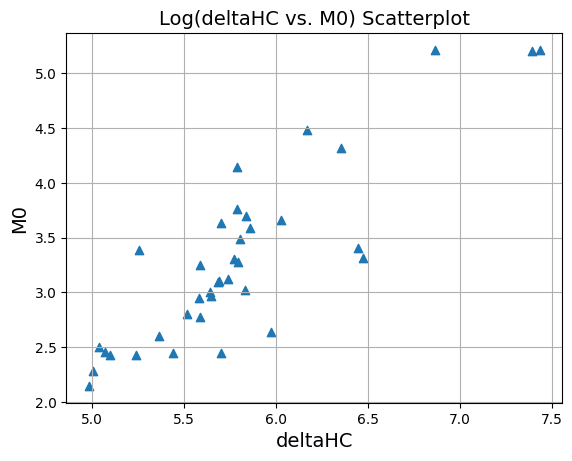

In [9]:
plt.scatter(logX, logY, marker = '^')
plt.xlabel('deltaHC', fontsize = 14)
plt.ylabel('M0', fontsize = 14)
plt.title(f'Log(deltaHC vs. M0) Scatterplot', fontsize = 14)
plt.grid()
plt.show()

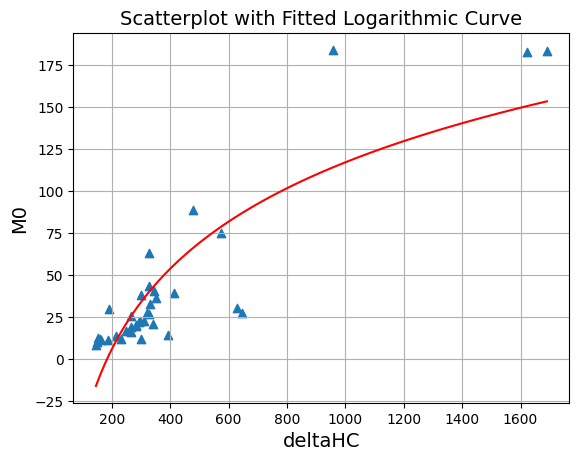

In [10]:
from scipy.optimize import curve_fit

def log_func(x, a, b):
    return a * np.log(x) + b

popt, pcov = curve_fit(log_func, X, y)

plt.scatter(X, y, marker = '^')
x_vals = np.linspace(X.min(), X.max(), 100)
plt.plot(x_vals, log_func(x_vals, *popt), 'r-')
plt.xlabel('deltaHC', fontsize = 14)
plt.ylabel('M0', fontsize = 14)
plt.title('Scatterplot with Fitted Logarithmic Curve', fontsize = 14)
plt.grid()
plt.show()

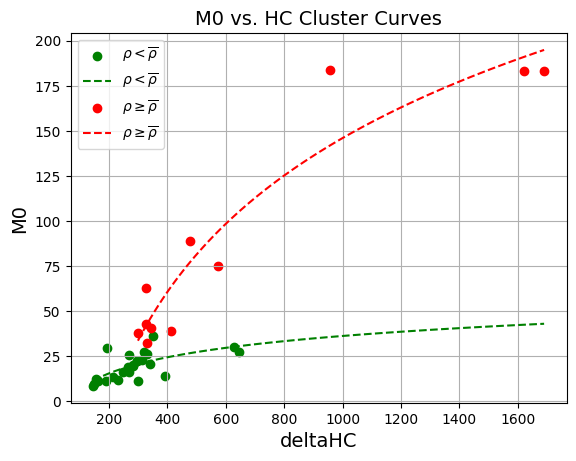

In [11]:
c = data['deltaHC / beta'] < data['deltaHC / beta'].mean()
c_not = np.logical_not(c)
popt1, pcov1 = curve_fit(log_func, X[c], y[c])
xvals1 = np.linspace(X[c].min(), max([X[c].max(), X[c_not].max()]), 100)
popt2, pcov2 = curve_fit(log_func, X[c_not], y[c_not])
xvals2 = np.linspace(X[c_not].min(), max([X[c].max(), X[c_not].max()]), 100)

plt.scatter(X[c], y[c], color = 'green', label = r'$\rho < \overline{\rho}$')
plt.plot(xvals1, log_func(xvals1, *popt1), color = 'green', label = r'$\rho < \overline{\rho}$', linestyle = '--')
plt.scatter(X[c_not], y[c_not], color = 'red', label = r'$\rho \geq \overline{\rho}$')
plt.plot(xvals2, log_func(xvals2, *popt2), color = 'red', label = r'$\rho \geq \overline{\rho}$', linestyle = '--')
plt.xlabel('deltaHC', fontsize = 14)
plt.ylabel('M0', fontsize = 14)
plt.title('M0 vs. HC Cluster Curves', fontsize = 14)
plt.grid()
plt.legend()
plt.show()

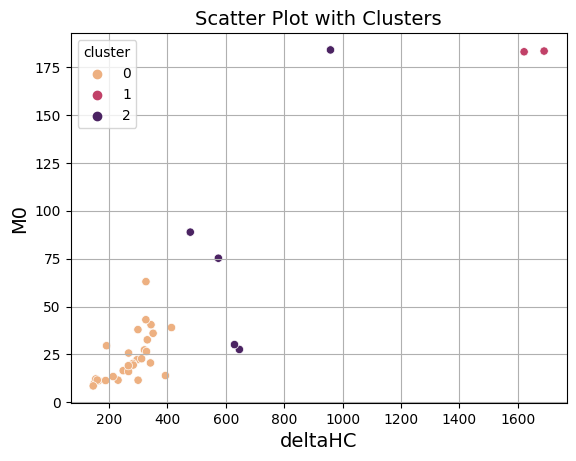

In [12]:
from sklearn.cluster import KMeans

df = pd.DataFrame({'X': X, 'Y': y})

kmeans = KMeans(n_clusters=3, n_init = 'auto')
df['cluster'] = kmeans.fit_predict(df[['X', 'Y']])

sns.scatterplot(data=df, x='X', y='Y', hue='cluster', palette='flare')
plt.title('Scatter Plot with Clusters', fontsize = 14)
plt.xlabel('deltaHC', fontsize = 14)
plt.ylabel('M0', fontsize = 14)
plt.grid()
plt.show()